In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
np.random.seed(42)
n_customers = 500
n_transactions = 3000

In [31]:
customers = pd.DataFrame({ 
    'CustomerID' : range(1, n_customers + 1),
    'Gender' : np.random.choice(['Male','Female'], size=n_customers),
     'Age': np.random.randint(18, 70, size=n_customers),
    'City': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=n_customers),
    'SignupDate': pd.to_datetime(np.random.choice(pd.date_range(start='2021-01-01', end='2023-01-01'), size=n_customers))
})

In [33]:
transactions = pd.DataFrame({
    'TransactionID': range(1, n_transactions + 1),
    'CustomerID': np.random.choice(customers['CustomerID'], size=n_transactions),
    'TransactionDate': pd.to_datetime(np.random.choice(pd.date_range(start='2021-01-01', end='2024-12-31'), size=n_transactions)),
    'Amount': np.round(np.random.exponential(scale=100, size=n_transactions), 2)
})

In [39]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
snapshot_date = merged_data['TransactionDate'].max() + pd.Timedelta(days=1)

In [41]:
rfm = merged_data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,
    'TransactionID': 'count',
    'Amount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]


In [43]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

C:\Users\syedh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [45]:
rfm_full = pd.merge(rfm, customers, on='CustomerID', how='left')


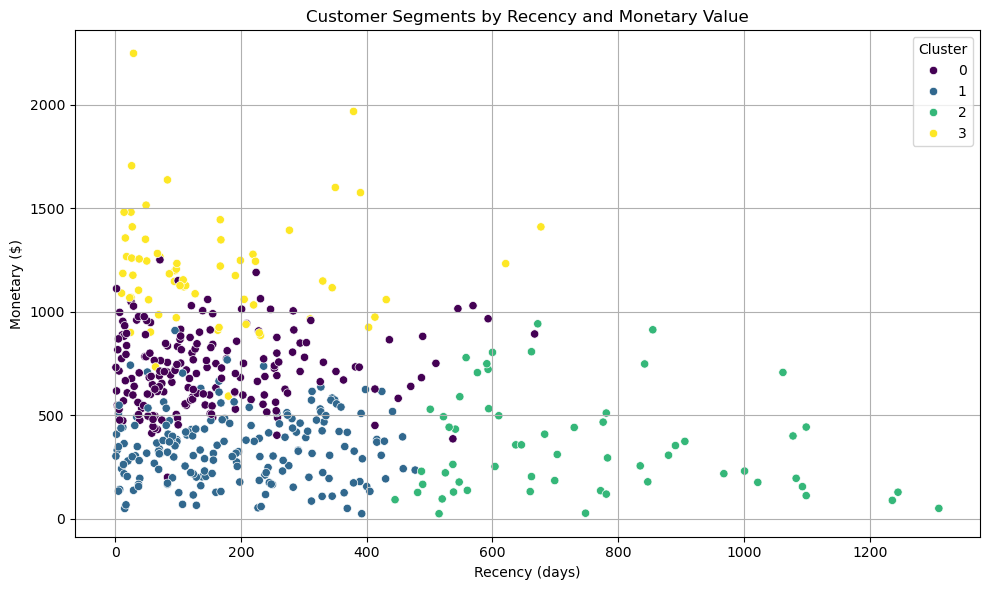

C:\Users\syedh\AppData\Local\Temp\ipykernel_19676\1099347176.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Cluster', palette='Set2')


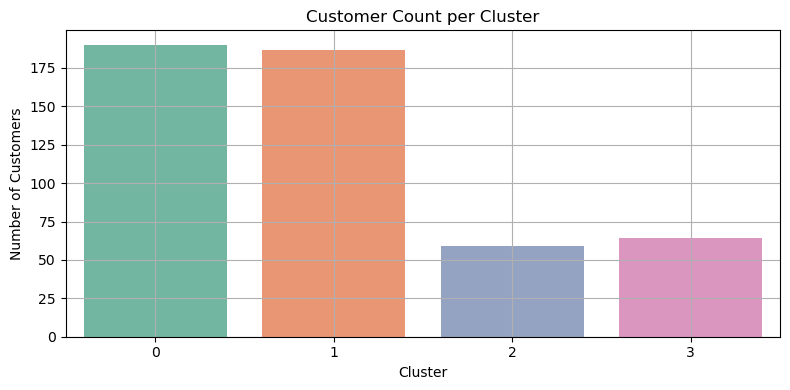

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segments by Recency and Monetary Value')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=rfm, x='Cluster', palette='Set2')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()